In [1]:
import colour
import matplotlib.pyplot as plt
import debayering
from debayering import mosaicing

2023-02-03 00:23:13.489802: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


/home/gosha20777/anaconda3/envs/debayer/lib/python3.9/site-packages/colour/utilities/verbose.py:266: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)


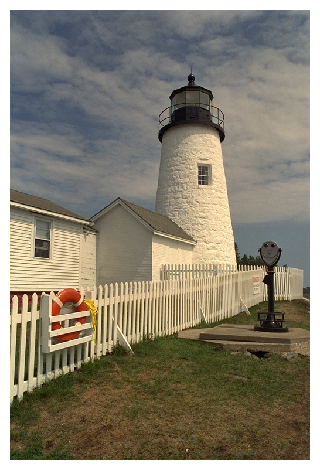

(768, 512, 3)

In [2]:
image = colour.io.read_image('data/Lighthouse.png')
colour.plotting.plot_image(colour.cctf_encoding(image))
image.shape

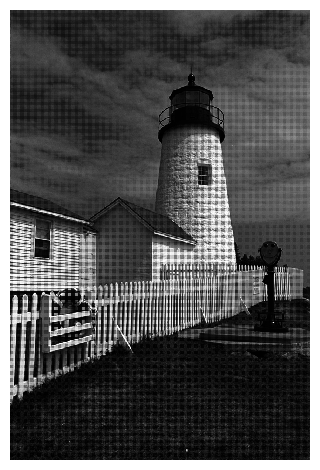

(768, 512)

In [3]:
bayer = mosaicing.rgb2bayer(image, pattern="BGGR")
colour.plotting.plot_image(bayer)
bayer.shape

Leniar

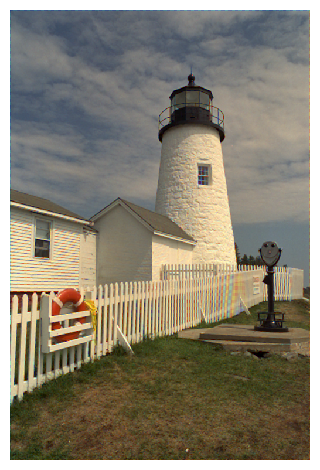

(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

In [4]:
from debayering import bileniar
rgb = bileniar.bayer2rgb(bayer, pattern="BGGR")
colour.plotting.plot_image(colour.cctf_encoding(rgb))

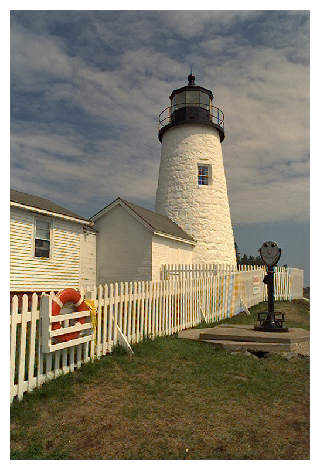

(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

In [5]:
from debayering import malvar
rgb = malvar.bayer2rgb(bayer, pattern="BGGR")
colour.plotting.plot_image(colour.cctf_encoding(rgb))

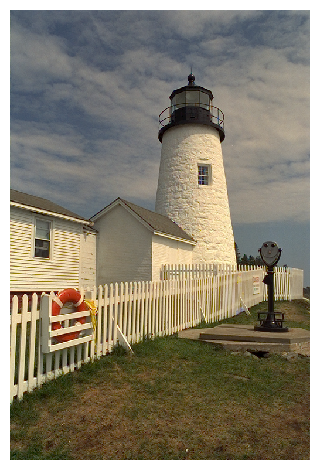

(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

In [6]:
from debayering import menon

rgb = menon.bayer2rgb(bayer, pattern="BGGR")
colour.plotting.plot_image(colour.cctf_encoding(rgb))

/home/gosha20777/anaconda3/envs/debayer/lib/python3.9/site-packages/colour/utilities/verbose.py:266: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)


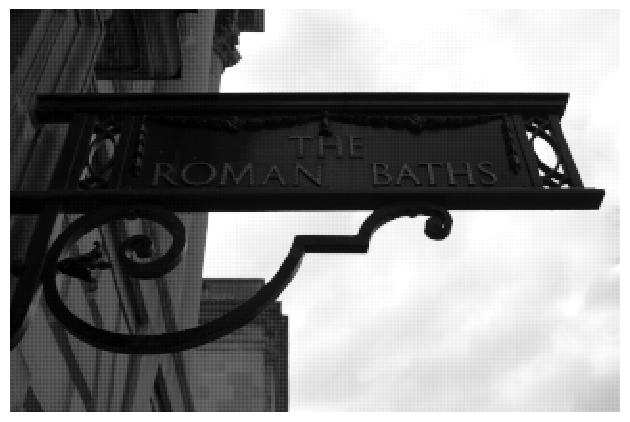

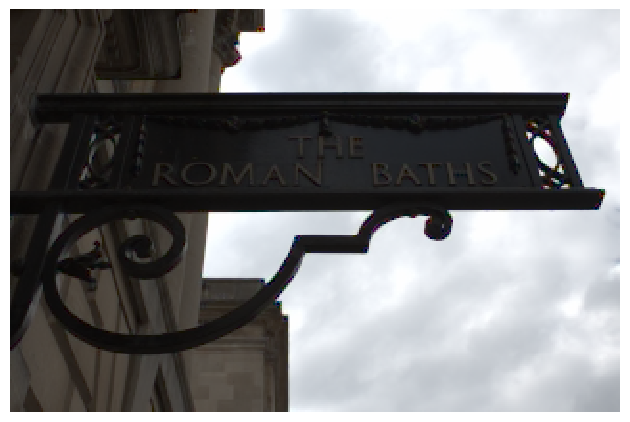

/home/gosha20777/anaconda3/envs/debayer/lib/python3.9/site-packages/colour/utilities/verbose.py:266: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)


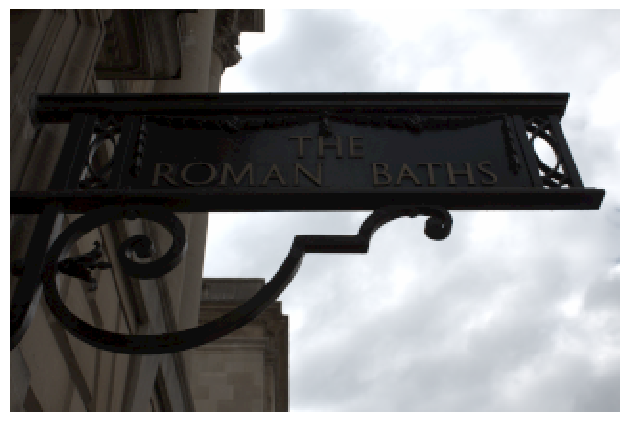

(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

In [7]:
raw = colour.io.read_image('data/dataset/input/1.png')
colour.plotting.plot_image(colour.cctf_encoding(raw))
rgb = menon.bayer2rgb(raw, pattern="RGGB")
colour.plotting.plot_image(colour.cctf_encoding(rgb))
gt = colour.io.read_image('data/dataset/groundtruth/1.png')[:,:,:3]
colour.plotting.plot_image(colour.cctf_encoding(gt))

In [8]:
from debayering.utils import evaluate

psnr, ssim = evaluate(bileniar, "data/dataset")

print('Bileniar')
print("PSNR: ", psnr)
print("SSIM: ", ssim)

psnr, ssim = evaluate(malvar, "data/dataset")

print('Malvar')
print("PSNR: ", psnr)
print("SSIM: ", ssim)

psnr, ssim = evaluate(menon, "data/dataset")

print('Мenon')
print("PSNR: ", psnr)
print("SSIM: ", ssim)

/home/gosha20777/anaconda3/envs/debayer/lib/python3.9/site-packages/colour/utilities/verbose.py:266: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)
2023-02-03 00:23:17.592368: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-03 00:23:17.593073: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Bileniar
PSNR:  31.4404257724
SSIM:  0.931879263175
Malvar
PSNR:  37.2042553885
SSIM:  0.973826712684
Мenon
PSNR:  39.7011094344
SSIM:  0.981253015368


(210, 318)